In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [123]:
general = pd.read_csv('general_final.csv')#, header=0, delimiter='\t',quoting=3)
df = general#[['chid','story','funds_raised_dollar','group_category','success','dum_success']]
conditionlist = [
    (general['created_date'] <= '2020-02-28') ,
    (general['created_date'] >= '2020-03-01') & (general['created_date'] <= '2020-06-30'),
    (general['created_date'] >= '2020-07-01') & (general['created_date'] <= '2020-11-04')]
choicelist = ['before_covid', 'during_covid', 'after_covid']
df['period'] = np.select(conditionlist, choicelist, default='Not Specified')

In [154]:
df.columns

Index(['chid', 'url', 'scrape_date', 'title', 'created_date', 'funds_raised',
       'funds_target', 'picture', 'org_picture', 'counts_status_code',
       'velocity_status_code', 'updates_status_code', 'comments_status_code',
       'donations_status_code', 'currency', 'category', 'story',
       'receiver_name', 'receiver_tax', 'total_photos', 'total_co_photos',
       'total_community_photos', 'total_updates', 'total_donations',
       'total_unique_donors', 'amount_raised_unattributed',
       'number_of_donations_unattributed', 'campaign_hearts',
       'social_share_total', 'num_recent_donations', 'recent_time_window',
       'funds_raised_dollar', 'funds_target_dollar',
       'amount_raised_unattributed_dollar', 'char_age', 'success',
       'dum_success', 'group_category', 'total_comments', 'update_counts',
       'period', 'len', 'words'],
      dtype='object')

In [152]:
b = df.sort_values('social_share_total')
b['social_share_total'].tail(77)


264      96290.0
3852    110048.0
2215    117970.0
3654    131540.0
20           NaN
          ...   
3516         NaN
3602         NaN
3646         NaN
3714         NaN
3747         NaN
Name: social_share_total, Length: 77, dtype: float64

In [146]:
a = df.sort_values('campaign_hearts')
a['campaign_hearts'].tail(77)


426     31031.0
3050    37333.0
2215    73400.0
3852    96957.0
20          NaN
         ...   
3516        NaN
3602        NaN
3646        NaN
3714        NaN
3747        NaN
Name: campaign_hearts, Length: 77, dtype: float64

## 카테고리 별 스토리 길이 비교

In [125]:
df['story'] = df['story'].astype(str)

In [126]:
df['len'] = round(df['story'].apply(len))
df['words'] = round(df['story'].apply(lambda x:len(x.split(' '))))
df

In [ ]:
df['com_len'] = round(df['comment'].apply(len))

In [128]:
df.to_csv('tableau.csv', header= True ,index= False)

In [85]:
category_len = df.groupby('group_category').mean().reset_index()
category_len

,group_category,chid,funds_raised_dollar,success,len,words
0,Accidents & Emergencies,1941.615942,84014.690217,0.378623,1760.616848,303.293478
1,Funerals & Memorials,2069.532039,67946.897087,0.505825,1285.424272,226.590291
2,"Medical, Illness & Healing",1874.533572,115133.568487,0.370636,2654.550582,454.673232
3,Others,1924.143951,47061.231240,0.341501,2103.298622,351.353752


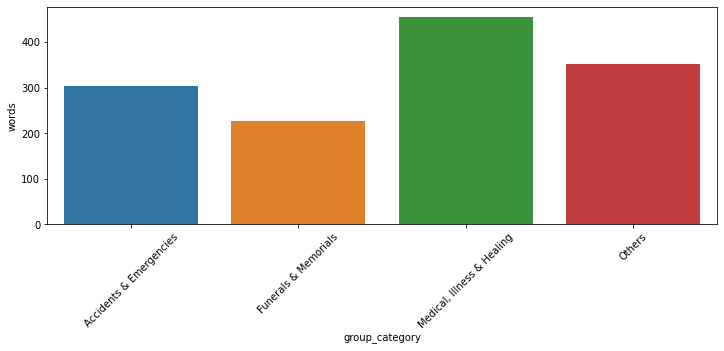

In [77]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(data=category_len, x='group_category', y='words')

## 스토리에 따른 기부액수

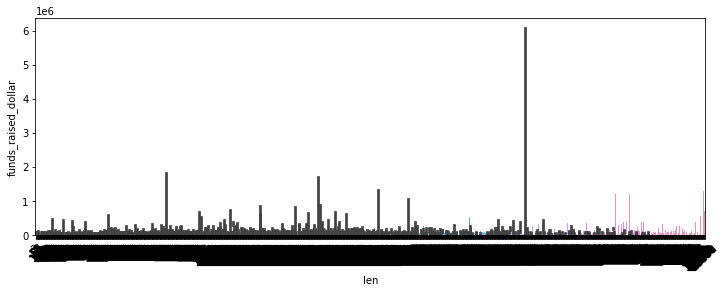

In [74]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(data=df, x='len', y='funds_raised_dollar')

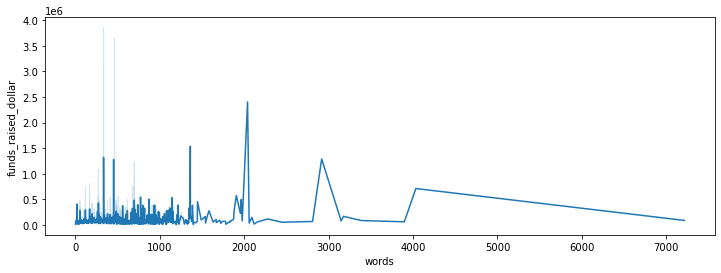

In [80]:
plt.figure(figsize=(12,4))
#plt.xticks(rotation=45)
sns.lineplot(data=df, x='words', y='funds_raised_dollar')

Text(0, 0.5, 'Number of story')

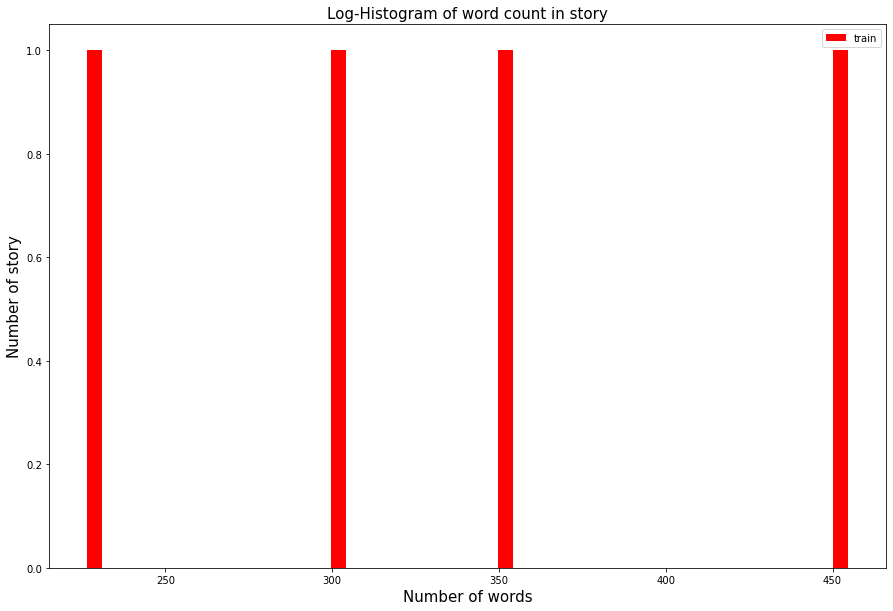

In [97]:
plt.figure(figsize=(15,10))
plt.hist(category_len['words'], bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in story', fontsize=15)
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of story', fontsize=15)

## 스토리에 따른 기부건수

In [88]:
count_len = df.groupby('len').count().reset_index()
count_len

,len,chid,story,funds_raised_dollar,group_category,success,period,words
0,3,52,52,52,52,52,52,52
1,12,1,1,1,1,1,1,1
2,53,2,2,2,2,2,2,2
3,54,1,1,1,1,1,1,1
4,55,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2421,19284,1,1,1,1,1,1,1
2422,20461,1,1,1,1,1,1,1
2423,21832,1,1,1,1,1,1,1
2424,22559,1,1,1,1,1,1,1


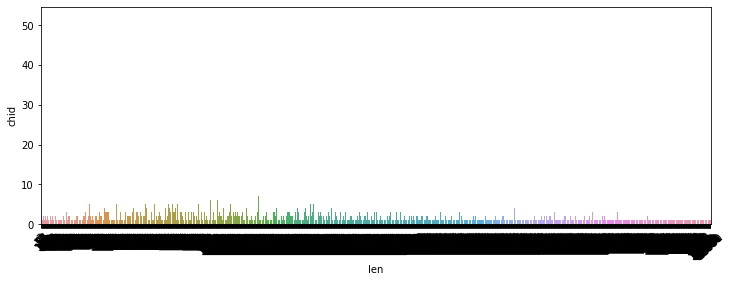

In [89]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(data=count_len, x='len', y='chid')

In [90]:
count_words = df.groupby('words').count().reset_index()
count_words

,words,chid,story,funds_raised_dollar,group_category,success,period,len
0,1,52,52,52,52,52,52,52
1,2,1,1,1,1,1,1,1
2,9,3,3,3,3,3,3,3
3,12,2,2,2,2,2,2,2
4,13,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
921,3176,1,1,1,1,1,1,1
922,3389,1,1,1,1,1,1,1
923,3896,1,1,1,1,1,1,1
924,4033,1,1,1,1,1,1,1


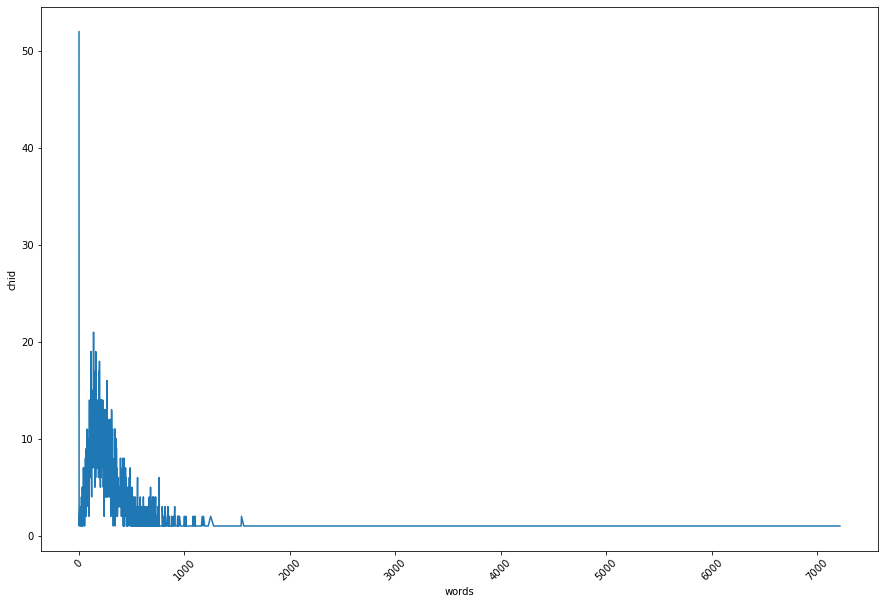

In [94]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.lineplot(data=count_words, x='words', y='chid')

## 스토리에 따른 성공 건수

In [104]:
success = df[df['success'] == True] 
success_len = success.groupby('len').count().reset_index()
#count_len
success_len

,len,chid,story,funds_raised_dollar,group_category,success,period,words
0,53,2,2,2,2,2,2,2
1,54,1,1,1,1,1,1,1
2,55,1,1,1,1,1,1,1
3,76,1,1,1,1,1,1,1
4,82,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1218,13306,1,1,1,1,1,1,1
1219,13383,1,1,1,1,1,1,1
1220,20461,1,1,1,1,1,1,1
1221,21832,1,1,1,1,1,1,1


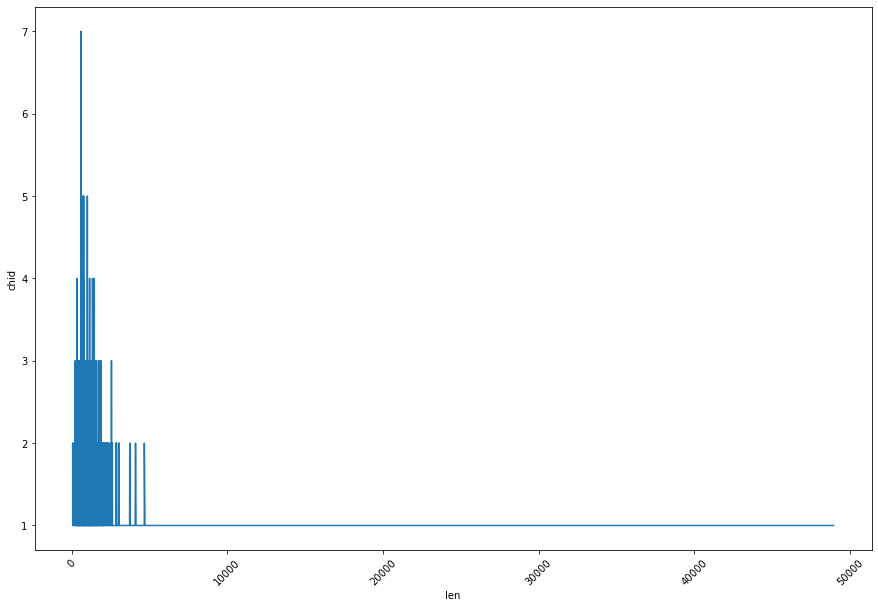

In [105]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.lineplot(data=success_len, x='len', y='chid')

In [107]:
success = df[df['success'] == True] 
success_words = success.groupby('words').count().reset_index()
#count_len
success_words

,words,chid,story,funds_raised_dollar,group_category,success,period,len
0,9,3,3,3,3,3,3,3
1,12,2,2,2,2,2,2,2
2,15,1,1,1,1,1,1,1
3,16,1,1,1,1,1,1,1
4,18,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
612,2195,1,1,1,1,1,1,1
613,2278,1,1,1,1,1,1,1
614,3389,1,1,1,1,1,1,1
615,4033,1,1,1,1,1,1,1


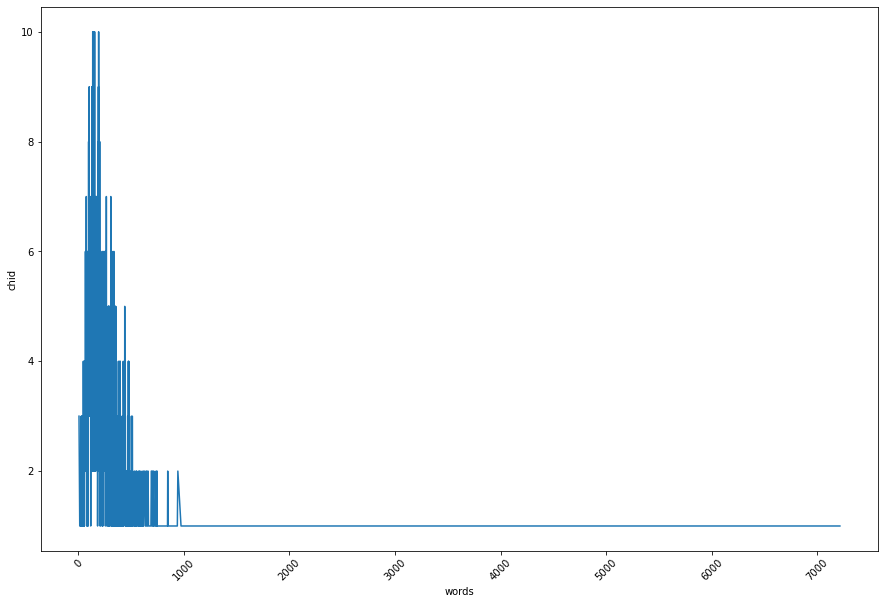

In [108]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.lineplot(data=success_words, x='words', y='chid')

## 스토리에 따른 성공 비율

In [111]:
success[''] = dum df[df['success'] == True]
success_ratio = success.groupby('words').count().reset_index()
#count_len
success_ratio



,words,chid,story,funds_raised_dollar,group_category,success,period,len
0,9,3,3,3,3,3,3,3
1,12,2,2,2,2,2,2,2
2,15,1,1,1,1,1,1,1
3,16,1,1,1,1,1,1,1
4,18,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
612,2195,1,1,1,1,1,1,1
613,2278,1,1,1,1,1,1,1
614,3389,1,1,1,1,1,1,1
615,4033,1,1,1,1,1,1,1


In [121]:
result = df.groupby('len')['dum_success'].sum().reset_index().rename(columns={'dum_success':'success_cases'})
result
#assert df.success_cases.sum() == df.dum_success.sum()
#result['sucess_cases_percentage'] = (result.success_cases / result.success_cases.sum()) *100
#result

,len,success_cases
0,3,0
1,12,0
2,53,2
3,54,1
4,55,1
...,...,...
2421,19284,0
2422,20461,1
2423,21832,1
2424,22559,0
